
### dataset location 
https://www.huduser.gov/portal/datasets/fmr.html#null

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request

<ipython-input-2-37777429a894>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
file = DATA_DIR / 'rent' / "FMR_2Bed_1983_2022_2.csv"

In [4]:
home_prices = pd.read_csv(file,encoding='latin1')

In [5]:
regions = [
    "Boston-Cambridge-Newton, MA-NH MSA",
    "Chicago-Naperville-Elgin, IL-IN-WI MSA",
    "New York, NY HUD Metro FMR Area",
    "Pittsburgh, PA MSA",
    "San Diego-Chula Vista-Carlsbad, CA MSA",
    "San Francisco-Oakland-Berkeley, CA MSA",
    "Baltimore-Columbia-Towson, MD MSA",
    "Portland-Vancouver-Hillsboro, OR-WA MSA",
    "Houston-The Woodlands-Sugar Land, TX HUD Metro FMR Area",
    "Ann Arbor, MI MSA",
    "Durham-Chapel Hill, NC HUD Metro FMR Area",

]

In [6]:
regions = [
    "Boston city",
    "New York County",
    "Cook County",
    "Allegheny County",
    "San Diego County",
    "San Francisco County",
    "Baltimore County",
    "Multnomah County",
    "Harris County",
    "Washtenaw County",
    "Durham County"
]

In [224]:
cba_subs = [
    "METRO41740M41740",
    "METRO41860MM7360",
    "METRO16980M16980",
    "METRO14460MM1120",
    "METRO35620MM5600",
    "METRO38300M38300",
    "METRO20500M20500",
    "METRO38900M38900",
    "METRO11460M11460",
    "METRO38900M38900",
    "METRO26420M26420",
    "METRO12580M12580"
]

In [225]:
home_prices_regions = home_prices[home_prices.name.isin(regions)]
home_prices_regions = home_prices_regions[home_prices_regions.cbsasub.isin(cba_subs)]

In [226]:
home_prices_regions

,fips2010,fips2000,areaname22,name,msa22,fmr22_2,fmr22,msa21,fmr21_2,fmr21,...,fmr83,cbsasub,areaname,state,cousub,county,pop2010,census_region,pop2017,pop2000
222,607399999,6.074000e+08,"San Diego-Carlsbad, CA MSA",San Diego County,METRO41740M41740,1979,40,METRO41740M41740,2124,40,...,45.0,METRO41740M41740,"San Diego-Carlsbad, CA MSA",6.0,99999.0,73.0,3095313,4.0,3283665,2813833.0
223,607599999,6.076000e+08,"San Francisco, CA HUD Metro FMR Area",San Francisco County,METRO41860MM7360,3198,40,METRO41860MM7360,3553,40,...,45.0,METRO41860MM7360,"San Francisco, CA HUD Metro FMR Area",6.0,99999.0,75.0,805235,4.0,864265,776733.0
771,1703199999,1.703200e+09,"Chicago-Joliet-Naperville, IL HUD Metro FMR Area",Cook County,METRO16980M16980,1340,40,METRO16980M16980,1299,40,...,45.0,METRO16980M16980,"Chicago-Joliet-Naperville, IL HUD Metro FMR Area",17.0,99999.0,31.0,5194675,2.0,5238540,5376741.0
1872,2400599999,2.400600e+09,"Baltimore-Columbia-Towson, MD MSA",Baltimore County,METRO12580M12580,1395,40,METRO12580M12580,1384,40,...,45.0,METRO12580M12580,"Baltimore-Columbia-Towson, MD MSA",24.0,99999.0,5.0,805029,3.0,828635,754292.0
2181,2502507000,2.502507e+09,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",Boston city,METRO14460MM1120,2205,40,METRO14460MM1120,2336,40,...,45.0,METRO14460MM1120,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",25.0,7000.0,25.0,617594,1.0,669160,589141.0
2325,2616199999,2.616200e+09,"Ann Arbor, MI MSA",Washtenaw County,METRO11460M11460,1262,40,METRO11460M11460,1264,40,...,45.0,METRO11460M11460,"Ann Arbor, MI MSA",26.0,99999.0,161.0,344791,2.0,361510,322895.0
3122,3606199999,3.606200e+09,"New York, NY HUD Metro FMR Area",New York County,METRO35620MM5600,2026,40,METRO35620MM5600,2053,40,...,45.0,METRO35620MM5600,"New York, NY HUD Metro FMR Area",36.0,99999.0,61.0,1585873,1.0,1653875,1537195.0
3185,3706399999,3.706400e+09,"Durham-Chapel Hill, NC HUD Metro FMR Area",Durham County,METRO20500M20500,1199,40,METRO20500M20500,1134,40,...,45.0,METRO20500M20500,"Durham-Chapel Hill, NC HUD Metro FMR Area",37.0,99999.0,63.0,267587,3.0,300865,223314.0
3497,4105199999,4.105200e+09,"Portland-Vancouver-Hillsboro, OR-WA MSA",Multnomah County,METRO38900M38900,1467,40,METRO38900M38900,1536,40,...,45.0,METRO38900M38900,"Portland-Vancouver-Hillsboro, OR-WA MSA",41.0,99999.0,51.0,735334,4.0,788460,660486.0
3509,4200399999,4.200400e+09,"Pittsburgh, PA HUD Metro FMR Area",Allegheny County,METRO38300M38300,981,40,METRO38300M38300,940,40,...,45.0,METRO38300M38300,"Pittsburgh, PA HUD Metro FMR Area",42.0,99999.0,3.0,1223348,1.0,1229605,1281666.0


In [227]:
home_prices_all_melt = home_prices.melt(id_vars="areaname22", value_vars = home_prices.columns[4:-7])
home_prices_all = home_prices_all_melt[np.array([i[-2:] == '_2' for i in home_prices_all_melt.variable.values])]
home_prices_all['Year'] = [get_year(i) for i in home_prices_all.variable.values]
home_prices_all[:3]

<ipython-input-227-077fa28666ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_all['Year'] = [get_year(i) for i in home_prices_all.variable.values]


,areaname22,variable,value,Year
4765,"Montgomery, AL MSA",fmr22_2,914,2022
4766,"Daphne-Fairhope-Foley, AL MSA",fmr22_2,1017,2022
4767,"Barbour County, AL",fmr22_2,705,2022


In [233]:
year_mean = {
    year: np.nanmean(home_prices_all[home_prices_all.Year == year].value.values.astype(float))
    for year in home_prices_all.Year.unique()
}

In [234]:
home_prices_regions_melt = home_prices_regions.melt(id_vars="areaname22", value_vars = home_prices_regions.columns[4:-7])

In [235]:
home_prices_regions = home_prices_regions_melt[np.array([i[-2:] == '_2' for i in home_prices_regions_melt.variable.values])]
home_prices_regions

,areaname22,variable,value
11,"San Diego-Carlsbad, CA MSA",fmr22_2,1979
12,"San Francisco, CA HUD Metro FMR Area",fmr22_2,3198
13,"Chicago-Joliet-Naperville, IL HUD Metro FMR Area",fmr22_2,1340
14,"Baltimore-Columbia-Towson, MD MSA",fmr22_2,1395
15,"Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area",fmr22_2,2205
...,...,...,...
1271,"New York, NY HUD Metro FMR Area",fmr83_2,420.0
1272,"Durham-Chapel Hill, NC HUD Metro FMR Area",fmr83_2,372.0
1273,"Portland-Vancouver-Hillsboro, OR-WA MSA",fmr83_2,369.0
1274,"Pittsburgh, PA HUD Metro FMR Area",fmr83_2,372.0


In [236]:
def get_year(x):
    year = x.split('_')[0][-2:]
    if int(year) < 80:
        year = int("20"+year)
    else:
        year = int("19"+year)
    return year

In [237]:
home_prices_regions['Year'] = [get_year(i) for i in home_prices_regions.variable.values]

<ipython-input-237-65fe836d9ee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_regions['Year'] = [get_year(i) for i in home_prices_regions.variable.values]


In [238]:
home_prices_regions[:3]

,areaname22,variable,value,Year
11,"San Diego-Carlsbad, CA MSA",fmr22_2,1979,2022
12,"San Francisco, CA HUD Metro FMR Area",fmr22_2,3198,2022
13,"Chicago-Joliet-Naperville, IL HUD Metro FMR Area",fmr22_2,1340,2022


In [239]:
home_prices_regions['relative_price'] = [row.value / year_mean[row.Year] for idx, row in home_prices_regions.iterrows()]

<ipython-input-239-5afdc5e50800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_prices_regions['relative_price'] = [row.value / year_mean[row.Year] for idx, row in home_prices_regions.iterrows()]


In [ ]:
home_prices_regions[]

In [240]:
import seaborn as sns

Text(0, 0.5, 'Fair Market Rent')

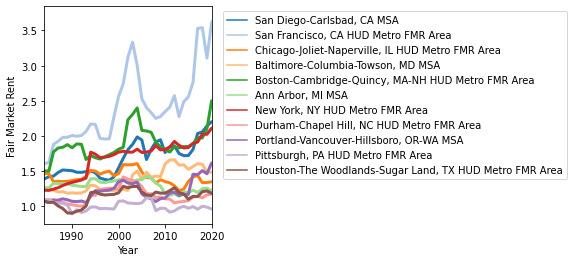

In [255]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=home_prices_regions,
    x="Year",
    y="relative_price",
    hue="areaname22",
    ax=ax,
    lw=3,
    palette='tab20'
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])
ax.set_ylabel("Fair Market Rent")

AttributeError: 'Line2D' object has no property 'palette'

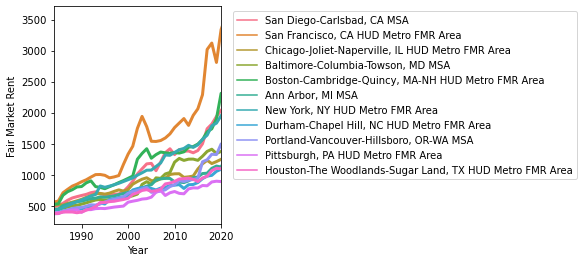

In [256]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.lineplot(
    data=home_prices_regions, x="Year", y="value", hue="areaname22", ax=ax,
    lw=3
)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlim([1984, 2020])
ax.set_ylabel('Fair Market Rent')

plt.plot(
    list(year_mean.keys()),
    list(year_mean.values()),
    color = 'grey',
    ls = 'dashed',
    lw = 4,
    
)

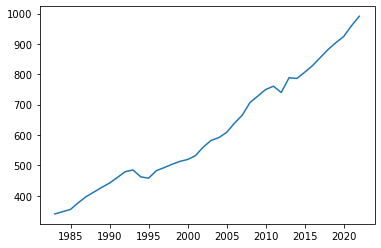